
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Paige McKenzie (pam2932), Yannick Heard (yoh64)</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

A smaller K corresponds to a more complicated model, which while experience lower bias and higher variance. A larger K corresponds to a simpler model, while will experience higher bias and lower variance.

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

## Part A

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("russett_full_v2.csv")

df.head()

,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


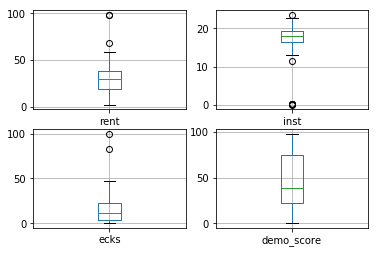

In [3]:
#-------------------------------Part A--------------------------------
box = plt.figure(1)
plt.subplot(221)
rent_outliers = df.boxplot(column='rent', return_type='dict')['fliers'][0].get_data()[1]

plt.subplot(222)
inst_outliers = df.boxplot(column='inst', return_type='dict')['fliers'][0].get_data()[1]

plt.subplot(223)
ecks_outliers = df.boxplot(column='ecks', return_type='dict')['fliers'][0].get_data()[1]

plt.subplot(224)
demo_outliers = df.boxplot(column='demo_score', return_type='dict')['fliers'][0].get_data()[1]

In [4]:
len(demo_outliers)

0

Note that there are no outliers in the demo_score values, so we will ignore this for the rest of our analysis.

In [5]:
#set up dataframes for plotting without outliers
rent_strip = df[~df['rent'].isin(rent_outliers)]

inst_strip = df[~df['inst'].isin(inst_outliers)]

ecks_strip = df[~df['ecks'].isin(ecks_outliers)]

In [6]:
# set up dataframes for adding outliers to plot
rent_outliers = df[df['rent'].isin(rent_outliers)]
inst_outliers = df[df['inst'].isin(inst_outliers)]
ecks_outliers = df[df['ecks'].isin(ecks_outliers)]

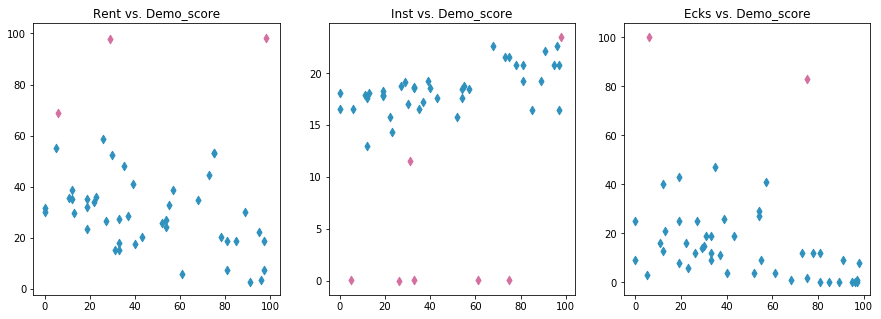

In [7]:
fig=plt.figure(figsize=(15,5))

ax=fig.add_subplot(131, title='Rent vs. Demo_score')
ax.scatter(rent_strip['demo_score'], rent_strip['rent'], marker="d", color="#2e91be")
ax.scatter(rent_outliers['demo_score'], rent_outliers['rent'], marker="d", color="#d46f9f")

ax=fig.add_subplot(132, title='Inst vs. Demo_score')
ax.scatter(inst_strip['demo_score'], inst_strip['inst'], marker="d", color="#2e91be")
ax.scatter(inst_outliers['demo_score'], inst_outliers['inst'], marker="d", color="#d46f9f")

ax=fig.add_subplot(133, title='Ecks vs. Demo_score')
ax.scatter(ecks_strip['demo_score'], ecks_strip['ecks'], marker="d", color="#2e91be")
ax.scatter(ecks_outliers['demo_score'], ecks_outliers['ecks'], marker="d", color="#d46f9f")

Including the outliers in Rent vs. Demo_score or Ecks vs. Demo_score would raise the model's estimate of Demo_score, while includin outliers in Inst vs. Demo_score would drag the estimate down.

## Part B

In [8]:
#------------------------Part B------------------------

#set up X,y for model building
y = np.array(df['demo_score'])
X = np.array(df[['rent', 'inst', 'ecks']])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=22)

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
model = sm.OLS(y_train, X_train)
result_OLS = model.fit()

prediction_train = result_OLS.predict(X_train)

print "In-sample root-mean-squared error:", rmse(y_train, prediction_train)

In-sample root-mean-squared error: 25.781460397


In [11]:
prediction_test = result_OLS.predict(X_test)
print "Out-of-sample root-mean-squared error:", rmse(y_test, prediction_test)

Out-of-sample root-mean-squared error: 32.580671803


## Part C

In [12]:
#--------------------------Part C-------------------------
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(fit_intercept=True, alpha=0.0)
result_hub = huber.fit(X_train, y_train)

prediction_train_hub = result_hub.predict(X_train)

print "Huber In-Sample Root-Mean-Squared Error:", rmse(y_train, prediction_train_hub)

Huber In-Sample Root-Mean-Squared Error: 26.8359286887


In [13]:
prediction_test_hub = result_hub.predict(X_test)
print "Huber Out-of-Sample Root-Mean-Squared Error:", rmse(y_test, prediction_test_hub)

Huber Out-of-Sample Root-Mean-Squared Error: 29.1663032149


## Part D

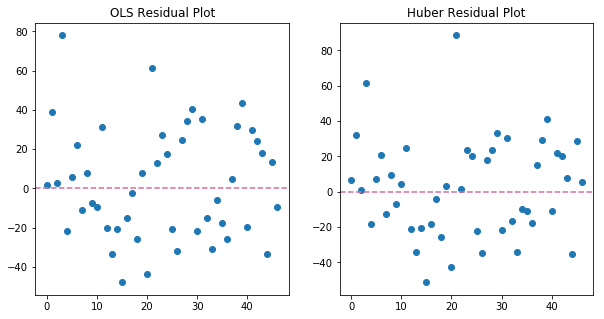

In [14]:
res_OLS = pd.Series(y - result_OLS.predict(X))
res_hub = pd.Series(y - result_hub.predict(X))

fig=plt.figure(figsize=(10,5))

ax=fig.add_subplot(121, title='OLS Residual Plot')
ax.axhline(y=0, linestyle='dashed', color="#d46f9f")
ax.scatter(res_OLS.index, res_OLS)

ax=fig.add_subplot(122, title='Huber Residual Plot')
ax.axhline(y=0, linestyle='dashed', color="#d46f9f")
ax.scatter(res_hub.index, res_hub)

Out-of-sample RMSE is lower when using the Huber loss, indicating overall improvement in model performance. 

Outliers impact OLS regression heavily, often severely impacting model performance. Huber loss is more robust to outliers, and so model performance will not suffer as much from the presence of outliers. 

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

## Part 1

The sample size, n, must follow the following equation:
$$ n \geq p(1-p)(\frac{z_{\alpha/2}}{\epsilon})^2 $$

<br><br>
(i) For $p=0.5$,
$$ n = 0.5(1-0.5)(\frac{1.6449}{0.03})^2 \approx 751 $$
So NBC should sample at least 752 viewers.

<br><br>
(ii) For $p=0.25$,
$$ n = 0.25(1-0.25)(\frac{1.6449}{0.03})^2 \approx 563 $$
So NBC should sample at least 564 viewers.

## Part 2

Once again using the equation:
$$ n = p(1-p)(\frac{z_{\alpha/2}}{\epsilon})^2 $$
<br>
Given $n=1000, \alpha=.02$:
$$ 1000 = p(1-p)(\frac{z_{.01}}{\epsilon})^2 $$
$$ \frac{p(1-p)}{\epsilon^2} = \frac{1000}{(z_{.01})^2} = \frac{1000}{2.326^2}$$
<br><br><br>
(i) Reducing $\alpha$ to .01:
$$ n_0 = \frac{p(1-p)}{\epsilon^2}*z_{.005}^2 = \frac{1000}{2.326^2}*2.576^2 \approx 1226$$
So NBC would have to sample 1227 viewers.
<br><br><br>
(ii) Reducing $\epsilon$ by a factor of 2 from the original value, and increasing $\alpha$ to 0.05:
$$ n_1 = p(1-p)(\frac{z_{.025}}{\frac{\epsilon}{2}})^2 = 4*\frac{p(1-p)}{\epsilon^2}*z_{.025}^2$$
$$ n_1 = 4*\frac{1000}{2.326^2}*1.96^2 \approx 2,840$$
So NBC would have to sample 2,841 viewers.

# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [15]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [16]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

## Part A

In [17]:
#---------------------Part A---------------------------
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

pca = PCA()
pca_fit = pca.fit(X)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


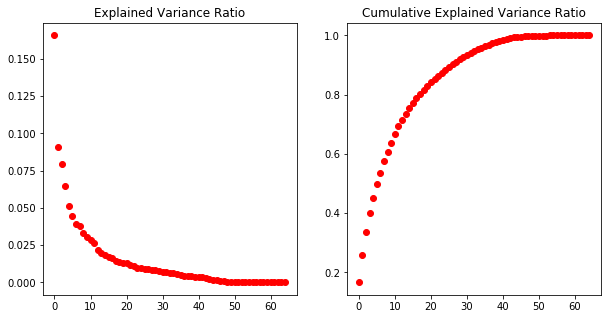

In [18]:
cum_ratio = np.cumsum(pca_fit.explained_variance_ratio_)

fig=plt.figure(figsize=(10,5))

ax=fig.add_subplot(121, title='Explained Variance Ratio')
plt.plot(pca_fit.explained_variance_ratio_, 'ro')

ax=fig.add_subplot(122, title='Cumulative Explained Variance Ratio')
plt.plot(cum_ratio, 'ro')

plt.show()

## Part B

In [19]:
N1 = 0
N2 = 0
N3 = 0

for i in range(len(cum_ratio)):
    if cum_ratio[i]>.9 and N3==0:
        N3=i+1
    elif cum_ratio[i]>.6 and N2==0:
        N2=i+1
    elif cum_ratio[i]>.3 and N1==0:
        N1=i+1
        
print N1, "components are required to explain 30% of variance,"
print N2, "components are required to explain 60% of variance,"
print N3, "components are required to explain 90% of variance."

3 components are required to explain 30% of variance,
9 components are required to explain 60% of variance,
27 components are required to explain 90% of variance.


## Part C

In [20]:
from statsmodels.tools.eval_measures import mse
from sklearn.linear_model import LinearRegression

In [21]:
#run PCA for each component size, and report in-sample RMSE

for item in [N1, N2, N3]:
    pca = PCA(n_components=item)
    X_pca = pca.fit_transform(X)
    
    model = LinearRegression()
    result_OLS = model.fit(X_pca, y)

    prediction = result_OLS.predict(X_pca)

    print "In-sample mean-squared error (for {0} components): {1}".format(item, mse(y, prediction))

In-sample mean-squared error (for 3 components): 5120.60554779
In-sample mean-squared error (for 9 components): 3942.78675143
In-sample mean-squared error (for 27 components): 2857.425949


# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 

Wrapper methods repeatedly select features, re-fit the model, and calculate a measure of accuracy to determine how predictive the features are. 

Forward selection starts by fitting the model to a single feature in turn, and selecting the best fit. It then adds a second feature, trying combinations of other features with the feature determined to be the best fit in the previous step, and so on until adding features produces no improvement, or insignificant improvement in model accuracy.

Backward selection stats by fitting the model to every feature, then attempting to remove a single feature at a time, trying to determine which features can be removed with the least decrease in model accuracy.